# Import the data file

In [1]:
import pandas as pd
df = pd.read_csv('/cardio_train.csv')
#df = df.drop(columns=['age(Days)'])
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
# no of samples 

count_samples = df.shape[0]
print("Number of samples in the dataset:", count_samples)

# no of features

count_features = df.shape[1]
print("Number of features in the dataset:", count_features)

Number of samples in the dataset: 70000
Number of features in the dataset: 13


# Data Summarization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Data Manipulation

In [5]:
df['age']=(df['age']/365).astype(int)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


# Corelation Matrix of the data

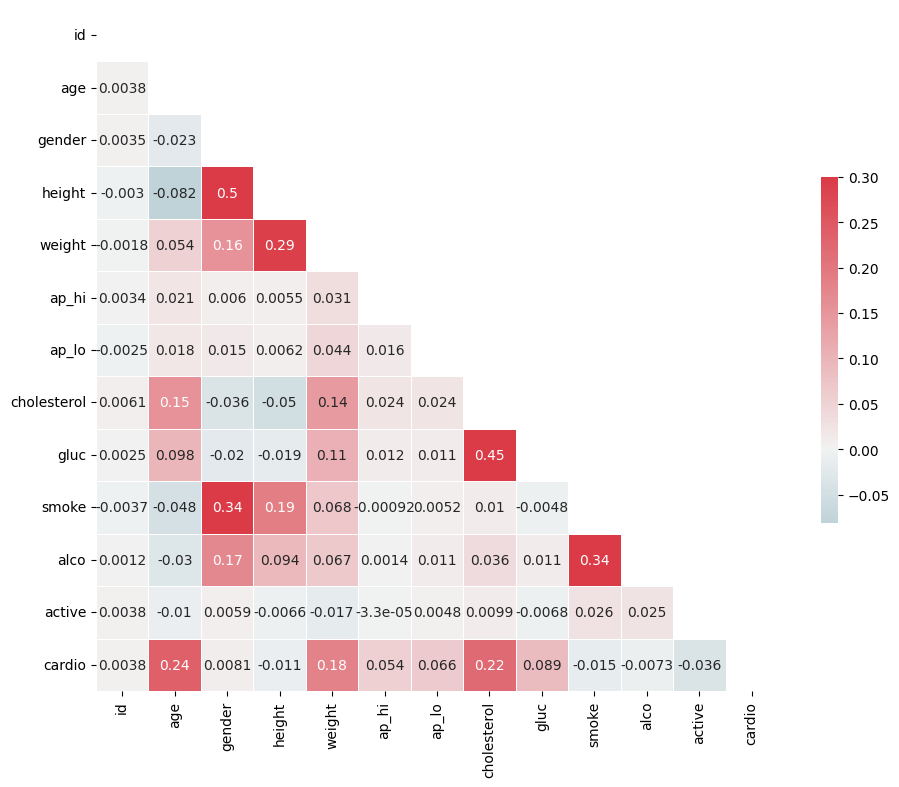

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

# Generating a  colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generating a mask for the upper triangle (to reduce redundancy)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# heatmap with mask
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


# Checking for null values

In [7]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Checking for Duplicate values

In [8]:
df.duplicated().sum()

0

# Checking for negative Values in the dataset

In [9]:
def check_all_positive(df):
    # Iterating through each column
    for column in df.columns:
        # Check if all values in the column are positive
        if not (df[column] >= 0).all():
            print(f"Column '{column}' contains non-positive values.")
        else:
            print(f"All values in column '{column}' are positive.")

# Calling the function to check the dataset
check_all_positive(df)

All values in column 'id' are positive.
All values in column 'age' are positive.
All values in column 'gender' are positive.
All values in column 'height' are positive.
All values in column 'weight' are positive.
Column 'ap_hi' contains non-positive values.
Column 'ap_lo' contains non-positive values.
All values in column 'cholesterol' are positive.
All values in column 'gluc' are positive.
All values in column 'smoke' are positive.
All values in column 'alco' are positive.
All values in column 'active' are positive.
All values in column 'cardio' are positive.


# Removal of negativevalues

In [10]:
df_cleaned = df[(df >= 0).all(axis=1)]
print(df_cleaned.shape)
df_cleaned.head()

(69992, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


# Removing ouliers

The below code uses z-scores to measure how far each data point deviates from the average in a dataset. It identifies outliers by setting a threshold, then removes those outliers to clean the data for further analysis. Here the threshold of 3 is used which  means that any data point with a z-score greater than 3 or less than -3 is flagged as an outlier


In [11]:
from scipy.stats import zscore

# Calculating Z-scores for the features
z_scores = df_cleaned.apply(zscore)

# Setting threshold
threshold = 3

# Identifying outliers
outliers = (z_scores.abs() > threshold).any(axis=1)

# Removing outliers
df_no_outliers = df_cleaned[~outliers]

# Verify the shape of the dataset after removing the  outliers
print("Shape after removing outliers: ", df_no_outliers.shape)
df_no_outliers.head()

Shape after removing outliers:  (55691, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


# Checking data Imbalance

The below numbers shows that data is slightly Imabalanced.

In [12]:
target_counts = df_no_outliers['cardio'].value_counts()
print(target_counts)



0    28690
1    27001
Name: cardio, dtype: int64


# Applying SMOTE process to remove this data Imbalance

In [13]:
x = df_no_outliers.drop(columns=['id','cardio'])
y = df_no_outliers['cardio']

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [15]:
y_counts = y_resampled.value_counts()
print(y_counts)

0    28690
1    28690
Name: cardio, dtype: int64


# Checking Feature Importamce 

In [16]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt

selector = SelectKBest(mutual_info_classif, k=11)  # Select top 11 features
X_selected = selector.fit_transform(x_resampled, y_resampled)  
selected_features = x_resampled.columns[selector.get_support()]
scores = selector.scores_

feature_scores = sorted(zip(selected_features, scores[selector.get_support()]), key=lambda x: x[1], reverse=True)

# Print feature names and their scores in descending order
print("Feature\t\t\tScore")
print("----------------------------------")
for feature, score in feature_scores:
    print(f"{feature.ljust(25)}{score:.4f}")


Feature			Score
----------------------------------
ap_hi                    0.1186
ap_lo                    0.0716
age                      0.0382
weight                   0.0259
cholesterol              0.0233
gluc                     0.0060
active                   0.0048
height                   0.0035
gender                   0.0013
smoke                    0.0000
alco                     0.0000


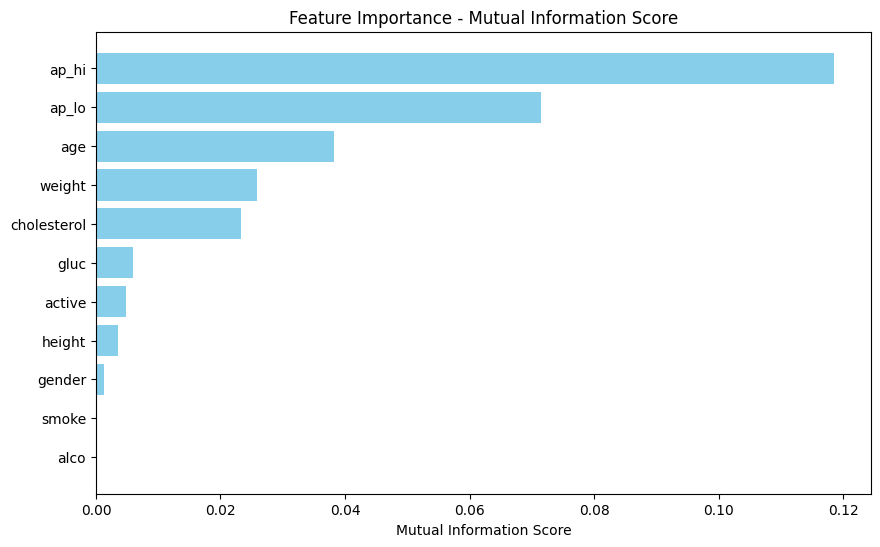

In [17]:
import matplotlib.pyplot as plt


feature_names = [x[0] for x in feature_scores]
scores = [x[1] for x in feature_scores]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, scores, color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance - Mutual Information Score')
plt.gca().invert_yaxis()  
plt.show()


# Removing irrelavant features

In [18]:
irrelevant_features = ['gender','smoke', 'alco','height'] 
x_resampled_selected = x_resampled.drop(columns=irrelevant_features)
x_resampled_selected.head()

,age,weight,ap_hi,ap_lo,cholesterol,gluc,active
0,50,62.0,110,80,1,1,1
1,55,85.0,140,90,3,1,1
2,51,64.0,130,70,3,1,0
3,48,82.0,150,100,1,1,1
4,47,56.0,100,60,1,1,0


# Splitting data for training the model with relevant Features

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled_selected, y_resampled, test_size=0.2, random_state=42)

# Training Model with Linear SVM Model ( Using standard Scaler)

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42, max_iter=1200000)),
    ])

svm_clf.fit(x_train, y_train)

SVM_predictions = svm_clf.predict(x_test)
print("Predictions: \n", SVM_predictions)

print( "\n Accuracy: ", round(accuracy_score(y_test, SVM_predictions )*100,2) ,"%")

print( "\n Confusion Matrix: \n ", confusion_matrix(y_test, SVM_predictions ))

print( "\n Classification Report:\n", classification_report(y_test, SVM_predictions ) )

#Here The warning received is a "FutureWarning," indicating that in future versions of scikit-learn, the default value for the
# dual parameter in LinearSVC will change. Currently, the default value is True, but it will change to 'auto' in version 1.5. 
# To avoid this warning, one should explicitly set the value of dual in your LinearSVC constructor.

C:\Users\ToucH\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Predictions: 
 [0 0 0 ... 1 1 0]

 Accuracy:  72.73 %

 Confusion Matrix: 
  [[4768 1065]
 [2064 3579]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.75      5833
           1       0.77      0.63      0.70      5643

    accuracy                           0.73     11476
   macro avg       0.73      0.73      0.72     11476
weighted avg       0.73      0.73      0.72     11476



# Training Model with Linear SVM Model ( Using MinMax Scaler)

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
svm_clf_minmax = Pipeline([
        ("scaler", MinMaxScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42, max_iter=1200000)),
    ])

svm_clf_minmax.fit(x_train, y_train)
SVM_predictions_minmax = svm_clf_minmax.predict(x_test)
print("Predictions: \n", SVM_predictions_minmax)

print( "\n Accuracy: ", round(accuracy_score(y_test, SVM_predictions_minmax )*100,2) ,"%")

print( "\n Confusion Matrix: \n ", confusion_matrix(y_test, SVM_predictions_minmax ))

print( "\n Classification Report:\n", classification_report(y_test, SVM_predictions_minmax ) )

C:\Users\ToucH\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Predictions: 
 [0 0 0 ... 1 1 0]

 Accuracy:  72.74 %

 Confusion Matrix: 
  [[4764 1069]
 [2059 3584]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.75      5833
           1       0.77      0.64      0.70      5643

    accuracy                           0.73     11476
   macro avg       0.73      0.73      0.72     11476
weighted avg       0.73      0.73      0.72     11476



# Training Model with Polynomial Kernel  and Degree 2

In [45]:
from sklearn.svm import SVC

poly_kernel_svm_clf_deg2= Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=5))
    ])
poly_kernel_svm_clf_deg2.fit(x_train, y_train)
poly_predictions_deg2 = poly_kernel_svm_clf_deg2.predict(x_test)
print("Predictions: \n", poly_predictions_deg2)

print( "\n Accuracy: ", round(accuracy_score(y_test, poly_predictions_deg2)*100,2) ,"%")

print( "\n Confusion Matrix: \n ", confusion_matrix(y_test, poly_predictions_deg2))

print( "\n Classification Report:\n", classification_report(y_test, poly_predictions_deg2) )

Predictions: 
 [0 0 0 ... 1 1 0]

 Accuracy:  73.48 %

 Confusion Matrix: 
  [[4610 1223]
 [1820 3823]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      5833
           1       0.76      0.68      0.72      5643

    accuracy                           0.73     11476
   macro avg       0.74      0.73      0.73     11476
weighted avg       0.74      0.73      0.73     11476



# Training Model with Polynomial Kernel  and Degree 3

Accuracy is improved.

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
poly_kernel_svm_clf_deg3 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf_deg3.fit(x_train, y_train)
poly_predictions_deg3 = poly_kernel_svm_clf_deg3.predict(x_test)
print("Predictions: \n", poly_predictions_deg3)

print( "\n Accuracy: ", round(accuracy_score(y_test, poly_predictions_deg3)*100,2) ,"%")

print( "\n Confusion Matrix: \n ", confusion_matrix(y_test, poly_predictions_deg3))

print( "\n Classification Report:\n", classification_report(y_test, poly_predictions_deg3) )


Predictions: 
 [0 0 0 ... 1 1 0]

 Accuracy:  73.75 %

 Confusion Matrix: 
  [[4671 1162]
 [1851 3792]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.80      0.76      5833
           1       0.77      0.67      0.72      5643

    accuracy                           0.74     11476
   macro avg       0.74      0.74      0.74     11476
weighted avg       0.74      0.74      0.74     11476



# Training Model with Polynomial Kernel  and Degree 4

Accuracy decreased again

In [31]:
from sklearn.svm import SVC

poly_kernel_svm_clf_deg4= Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=4, coef0=1, C=5))
    ])
poly_kernel_svm_clf_deg4.fit(x_train, y_train)
poly_predictions_deg4 = poly_kernel_svm_clf_deg4.predict(x_test)
print("Predictions: \n", poly_predictions_deg4)

print( "\n Accuracy: ", round(accuracy_score(y_test, poly_predictions_deg4)*100,2) ,"%")

print( "\n Confusion Matrix: \n ", confusion_matrix(y_test, poly_predictions_deg4))

print( "\n Classification Report:\n", classification_report(y_test, poly_predictions_deg4) )

Predictions: 
 [0 0 0 ... 1 1 0]

 Accuracy:  73.73 %

 Confusion Matrix: 
  [[4655 1178]
 [1837 3806]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.80      0.76      5833
           1       0.76      0.67      0.72      5643

    accuracy                           0.74     11476
   macro avg       0.74      0.74      0.74     11476
weighted avg       0.74      0.74      0.74     11476



# Training Model with Polynomial Kernel  and Degree 3 with Minmax Scaler

Since the Degree 3 has the highest accuracy with polynomial kernel so I decided to change the scalar and useMinmax Scaler but the accuracy did not improved but decreased.

In [32]:
from sklearn.svm import SVC

poly_kernel_svm_clf_minmax = Pipeline([
        ("scaler", MinMaxScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf_minmax.fit(x_train, y_train)
poly_predictions_minmax = poly_kernel_svm_clf_minmax.predict(x_test)
print("Predictions: \n", poly_predictions_minmax)

print( "\n Accuracy: ", round(accuracy_score(y_test, poly_predictions_minmax)*100,2) ,"%")

print( "\n Confusion Matrix: \n ", confusion_matrix(y_test, poly_predictions_minmax))

print( "\n Classification Report:\n", classification_report(y_test, poly_predictions_minmax) )

Predictions: 
 [0 0 0 ... 1 1 0]

 Accuracy:  73.55 %

 Confusion Matrix: 
  [[4660 1173]
 [1862 3781]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      5833
           1       0.76      0.67      0.71      5643

    accuracy                           0.74     11476
   macro avg       0.74      0.73      0.73     11476
weighted avg       0.74      0.74      0.73     11476



# Validation Curves

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", coef0=1, C=5))
])
param_range = np.arange(2, 5)  
train_scores, valid_scores = validation_curve(
    poly_kernel_svm_clf, x_train, y_train, param_name="svm_clf__degree", param_range=param_range,
    scoring="accuracy", cv=5
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)
print("Training Scores:")
print(train_scores)
print("\nValidation Scores:")
print(valid_scores)
print("\nMean Training Scores:")
print(train_mean)
print("\nMean Validation Scores:")
print(valid_mean)

Training Scores:
[[0.72635678 0.72485908 0.72733709 0.72769109 0.72699052]
 [0.72984233 0.72782725 0.72954279 0.73161234 0.72818865]
 [0.72826294 0.72886202 0.72902541 0.73150342 0.72878771]]

Validation Scores:
[[0.72628254 0.73172857 0.7234506  0.72203464 0.72821351]
 [0.72748067 0.73216425 0.72541118 0.72323276 0.73180828]
 [0.72628254 0.73227317 0.72421305 0.71887594 0.72745098]]

Mean Training Scores:
[0.72664691 0.72940267 0.7292883 ]

Mean Validation Scores:
[0.72634197 0.72801943 0.72581914]


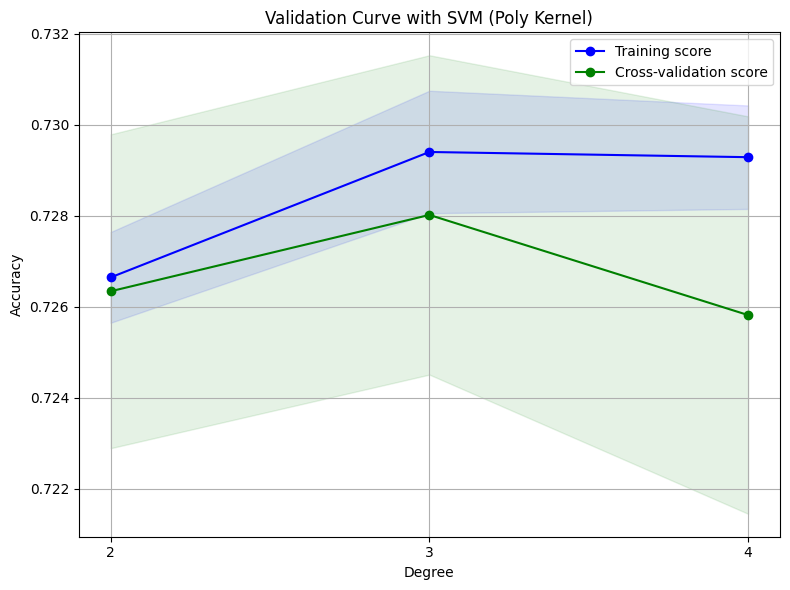

In [20]:
plt.figure(figsize=(8, 6))
plt.title("Validation Curve with SVM (Poly Kernel)")
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.xticks(param_range)
plt.grid()

plt.plot(param_range, train_mean, label="Training score", color="blue", marker="o")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(param_range, valid_mean, label="Cross-validation score", color="green", marker="o")
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color="green")

plt.legend(loc="best")
plt.tight_layout()
plt.show()